In [4]:
from utils.load_data import load_ddm_results, load_behavioral_data, load_pupil_results
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, false_discovery_control

In [5]:
ddm_params = load_ddm_results()

In [49]:
ddm_params = load_ddm_results().query("model_ID == 2 & param_name != 'BIC'")
behavioral_data = load_behavioral_data(min_RT=0.2)
pupil_data = load_pupil_results().query("sub != 4")
sub_cond = behavioral_data[["sub", "condition"]].drop_duplicates()
pupil_data = pupil_data.merge(sub_cond, on=["sub"])
pupil_data = pupil_data.merge(ddm_params, on=["sub"])

In [50]:
ddm_params

,Unnamed: 0,param_name,mean,std,2.5q,25q,50q,75q,97.5q,mc err,sub,model_ID
22,22,a,1.541663,0.123718,1.328634,1.457002,1.532318,1.614067,1.821428,0.005800,93,2
23,23,z,0.536479,0.024188,0.486931,0.520728,0.537107,0.553146,0.581957,0.000656,93,2
24,24,t,0.758366,0.043129,0.654725,0.735193,0.764916,0.787875,0.825659,0.001977,93,2
25,25,theta,0.352291,0.060815,0.229093,0.312238,0.353166,0.392462,0.472082,0.002478,93,2
26,26,v_gain,0.093567,0.003792,0.084016,0.091615,0.094337,0.096360,0.098686,0.000126,93,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3098,3098,z,0.582184,0.018513,0.543935,0.570082,0.583217,0.594765,0.616425,0.000486,52,2
3099,3099,t,0.563233,0.065820,0.417110,0.523724,0.569162,0.610133,0.673102,0.004164,52,2
3100,3100,theta,0.486411,0.077752,0.339416,0.432165,0.486776,0.537488,0.647768,0.004931,52,2
3101,3101,v_gain,0.195005,0.002742,0.188297,0.193518,0.195442,0.196990,0.199000,0.000096,52,2


In [51]:
p_values = []
r_values = []
for name in pupil_data["name"].unique():
    for param in pupil_data["param_name"].unique():
        d = pupil_data.query("name == @name  & param_name == @param")
        r, p = pearsonr(d["estimate"], d["mean"])
        p_values.append(p)
        r_values.append(r)

p_values = list(false_discovery_control(p_values, method="by"))

In [52]:
for name in pupil_data["name"].unique():
    for param in pupil_data["param_name"].unique():
        d = pupil_data.query("name == @name & param_name == @param")
        pval, rval = p_values.pop(0), r_values.pop(0)
        if pval > 0.05:
            continue
        else:
            print(name, param)
            print(pval, rval)

gain v_gain
0.004947718726103642 0.4804703154779141
gain v_loss
0.0009587146529667697 -0.5518168289385033
loss z
0.003287335290946119 0.5033830407008134


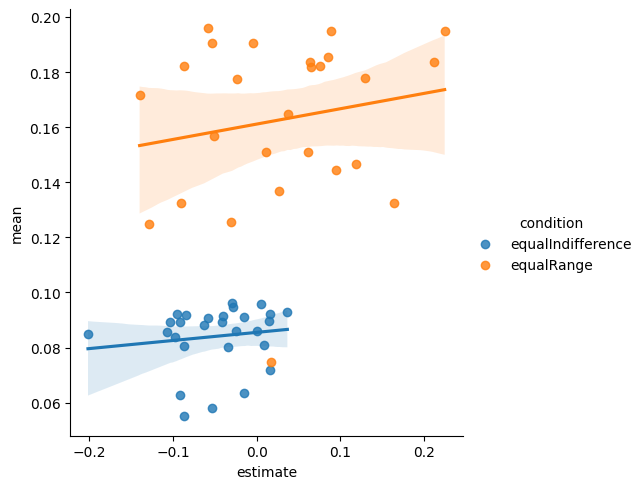

In [53]:
d = pupil_data.query("name == 'gain' & param_name == 'v_gain'")
sns.lmplot(d, x="estimate", y="mean", hue="condition")

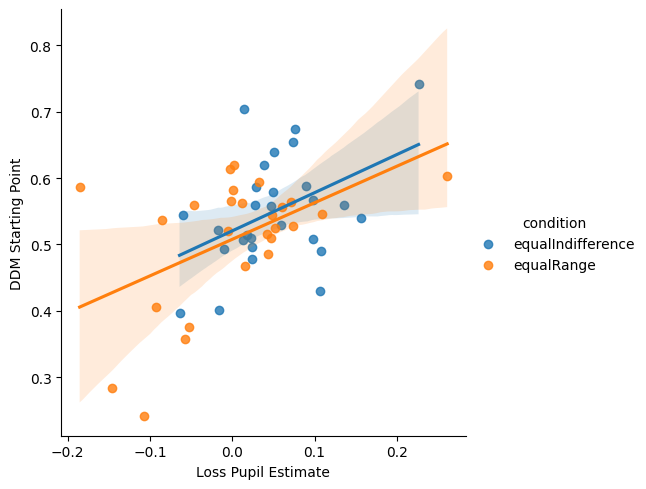

In [54]:
d = pupil_data.query("name == 'loss' & param_name == 'z'")
sns.lmplot(d, x="estimate", y="mean", hue="condition")
plt.xlabel("Loss Pupil Estimate")
plt.ylabel("DDM Starting Point")
plt.show()